<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E7%B0%A1%E5%96%AE%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8/sklearn%E5%AF%A6%E4%BD%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install wget

In [3]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")
wget.download('https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/Salary_Data.csv')

'Salary_Data.csv'

- 這個範例將演示如何使用 scikit-learn 的 LinearRegression 模型來預測簡單的線性關係。
- 假設我們有一組年資和薪水的數據，我們希望建立一個模型

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")


- Scikit-learn 的 LinearRegression 模型預期輸入特徵矩陣 X 為二維數組，即使只有一個特徵。 reshape(-1, 1) 確保了 X 的正確維度，以便模型能夠正確地進行擬合和預測。

- \-1 表示自動計算行數，以確保總元素個數不變。



In [6]:
import pandas as pd

url = "Salary_Data.csv"
data = pd.read_csv(url)
data
# y = w*x + b
X = data["YearsExperience"].to_numpy().reshape(-1,1)
y = data["Salary"].to_numpy()


In [7]:
# 2. 建立線性迴歸模型
model = LinearRegression()

# 3. 訓練模型
model.fit(X, y)

LinearRegression()

In [8]:
# 4. 進行預測

new_X1 = np.array([[3.5]])
predicted_y1 = model.predict(new_X1)
print(f"年資3.5  預測薪水:{predicted_y1[0]:.1f}K")

new_X2 = np.array([[5.9]])
predicted_y2 = model.predict(new_X2)
print(f"年資5.9  預測薪水:{predicted_y2[0]:.1f}K")

年資3.5  預測薪水:59.9K
年資5.9  預測薪水:81.8K


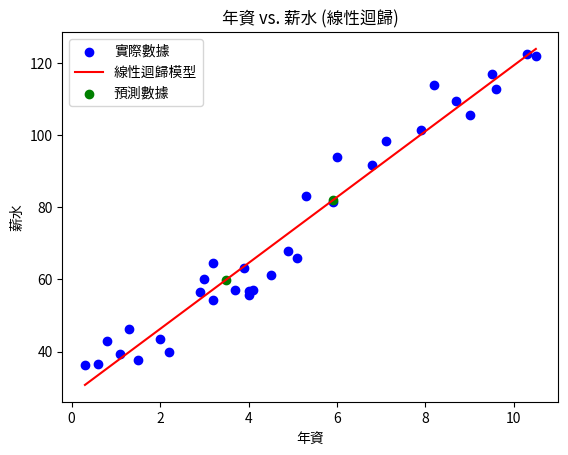

In [9]:
# 5. 可視化結果
plt.scatter(X, y, color='blue', label='實際數據')
plt.plot(X, model.predict(X), color='red', label='線性迴歸模型')
plt.scatter([new_X1,new_X2], [predicted_y1,predicted_y2], color='green', label='預測數據')
plt.xlabel('年資')
plt.ylabel('薪水')
plt.title('年資 vs. 薪水 (線性迴歸)')
plt.legend()
plt.show()

model.coef_[0] 給出迴歸係數，也就是權重 w (因為只有一個特徵，所以是 coef_[0]，多個特徵則會是一個陣列)。

model.intercept_ 給出截距，也就是偏移值 b。

這些值代表了所擬合的線性迴歸模型：y = w*x + b 中的 w 和 b。

In [10]:
# 6. 取得模型參數
print(f"迴歸係數 (斜率)：{model.coef_[0]:.2f}")
print(f"截距：{model.intercept_:.2f}")

迴歸係數 (斜率)：9.12
截距：28.01
